<a href="https://colab.research.google.com/github/imend35/verianalizokulu-yapayzeka-python/blob/main/M%C3%BC%C5%9Fteri_Segmentasyonu_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def musteri_verisi_olustur():

    np.random.seed(42)

    # Simüle edilmiş 100 müşteri verisi
    musteri_sayisi = 100

    veri = {
        'Musteri_ID': range(1001, 1001 + musteri_sayisi),
        # Ortalama İşlem Sayısı (Haftada 1-40 işlem)
        'Ort_Islem_Sayisi': np.random.randint(1, 40, musteri_sayisi),
        # Ortalama Hesap Bakiyesi (1.000 TL - 100.000 TL)
        'Ort_Bakiye_TL': np.random.randint(1000, 100000, musteri_sayisi)
    }
    df = pd.DataFrame(veri)

    return df

In [2]:
def k_means_uygula(df, k_degeri=3):

    # 1. Kümeleme için kullanılacak sütunları seçme
    X = df[['Ort_Islem_Sayisi', 'Ort_Bakiye_TL']]

    # 2. Modeli Oluşturma ve Eğitme
    kmeans = KMeans(n_clusters=k_degeri, random_state=42, n_init=10)
    kmeans.fit(X)

    # 3. Sonuçları Tahmin Etme ve DataFrame'e Ekleme
    df['Segment'] = kmeans.labels_
    merkezler = kmeans.cluster_centers_

    # Segment İsimlerini Mantıksal Olarak Atama (Opsiyonel)
    # Örn: Küme merkezine göre en yüksek Bakiye ve İşlem Sayısına sahip olanı "Yüksek Değerli" yapabiliriz.

    return df, merkezler

In [3]:
def kumeleme_grafik_ciz(df, merkezler):

    plt.figure(figsize=(10, 7))

    # Saçılım Grafiği: Müşterileri segment renkleriyle gösterir
    # hue='Segment' sayesinde Seaborn, 0, 1, 2 segmentlerine farklı renk atar.
    sns.scatterplot(x='Ort_Islem_Sayisi', y='Ort_Bakiye_TL', hue='Segment', data=df,
                    palette='tab10', s=100, legend='full')

    # Küme Merkezlerini İşaretleme
    plt.scatter(merkezler[:, 0], merkezler[:, 1], marker='X', s=300,
                color='black', label='Segment Merkezleri')

    plt.title('Banka Müşteri Segmentasyonu (K-Means)', fontsize=16)
    plt.xlabel('Ortalama Aylık İşlem Sayısı')
    plt.ylabel('Ortalama Hesap Bakiyesi (TL)')
    plt.legend(title='Müşteri Segmenti')
    plt.grid(True)
    plt.show()

--- Proje 7: Bankacılık Müşteri Segmentasyonu Başladı ---

--- İlk 5 Müşterinin Segment Ataması ---
   Musteri_ID  Ort_Islem_Sayisi  Ort_Bakiye_TL  Segment
0        1001                39          97354        1
1        1002                29          85651        1
2        1003                15          64335        0
3        1004                 8          11965        2
4        1005                21          25538        2


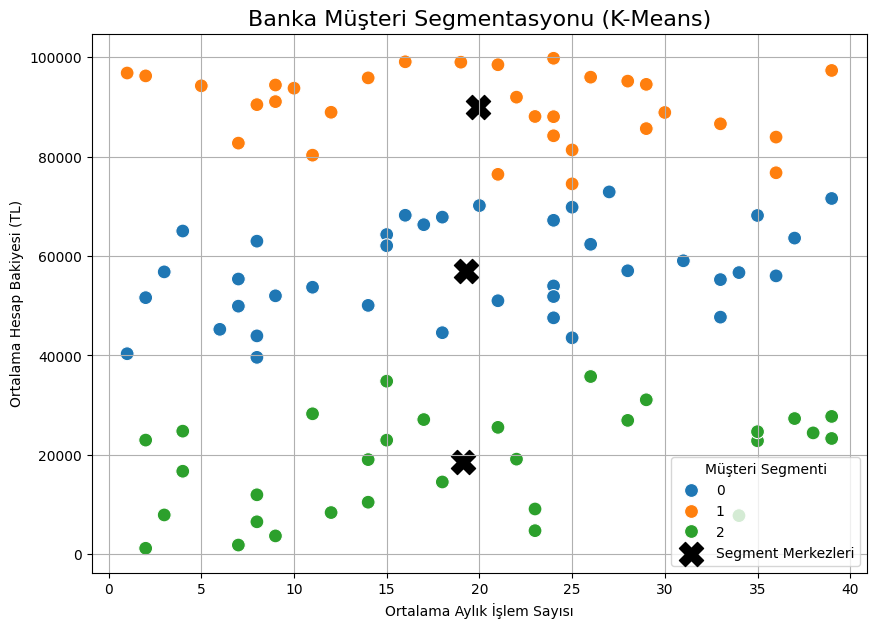

In [4]:
print("--- Proje 7: Bankacılık Müşteri Segmentasyonu Başladı ---")
musteri_df = musteri_verisi_olustur()
musteri_df_kumelenmis, merkezler = k_means_uygula(musteri_df)

print("\n--- İlk 5 Müşterinin Segment Ataması ---")
print(musteri_df_kumelenmis.head())

kumeleme_grafik_ciz(musteri_df_kumelenmis, merkezler)